In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [3]:
# creating data
## if we assume data to
#X,y = make_classification(n_samples = 1000 , n_features=2, n_classes = 2, n_clusters_per_class= 1, n_redundant =0)
##### if we take data from 2 different clusters there would be more overlap
X,y = make_classification(n_samples = 1000 , n_features=2, n_classes = 2, n_clusters_per_class= 2, n_redundant =0)

In [4]:
X

array([[ 0.92700809,  1.59402777],
       [-1.02018595, -1.16419122],
       [ 0.99990675, -0.8707316 ],
       ...,
       [-1.07004782, -2.4667769 ],
       [ 1.33147463, -0.28069637],
       [ 0.70614652,  2.57006524]])

In [5]:
## plotting both faetures to illustrate the data poitnts

<Axes: xlabel='0', ylabel='1'>

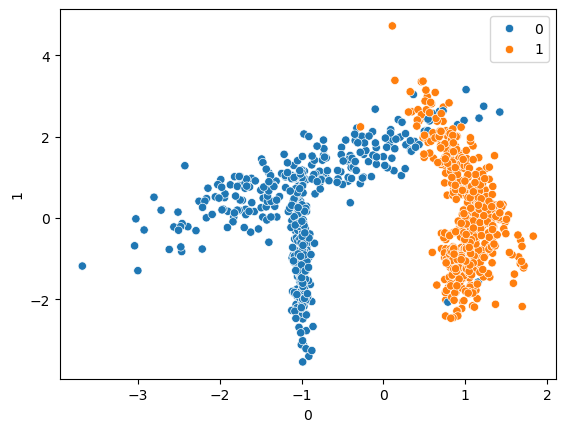

In [6]:
sns.scatterplot(x = pd.DataFrame(X)[0],y =pd.DataFrame(X)[1], hue = y)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

ValueError: Found input variables with inconsistent numbers of samples: [1000, 200]

In [ ]:
svc.fit(X_train, y_train)

In [ ]:
## Predictions

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

In [59]:
print(confusion_matrix(y_pred, y_test))

[[117   2]
 [  8 123]]


In [60]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       119
           1       0.98      0.94      0.96       131

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [61]:
## since not completely linearly separaeble so linaer kernel does not work well

In [62]:
rbf = SVC(kernel ='rbf')
rbf.fit(X_train, y_train)

SVC()

In [63]:
y_pred1 = rbf.predict(X_test)

In [64]:
print(confusion_matrix(y_pred1, y_test))
print(classification_report(y_pred1, y_test))
## imrpoment since it places the pointts into higheer dim

[[116   0]
 [  9 125]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       116
           1       1.00      0.93      0.97       134

    accuracy                           0.96       250
   macro avg       0.96      0.97      0.96       250
weighted avg       0.97      0.96      0.96       250



In [65]:
poly = SVC(kernel = 'poly')
poly.fit(X_train, y_train)
y_pred2 = poly.predict(X_test)
print(confusion_matrix(y_pred2, y_test))
print(classification_report(y_pred2, y_test))

[[117   7]
 [  8 118]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       124
           1       0.94      0.94      0.94       126

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [66]:
## rbf gave best accuracy so honna use that 

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.1, 1 , 10 , 100 , 0.01] , 'kernel' : ['rbf'], 'gamma' : [1,0.1, 0.01,0.001] 
}


In [68]:
grid = GridSearchCV(estimator = SVC(), param_grid = param_grid, refit = True, cv = 5, verbose = 3)
## by feault refit is true best praams found and then applied to the model

In [69]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.953 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 0.01],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [70]:
grid.best_score_

0.9800000000000001

In [71]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

### svm kernel indepth intuition

In [149]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2 - x**2)

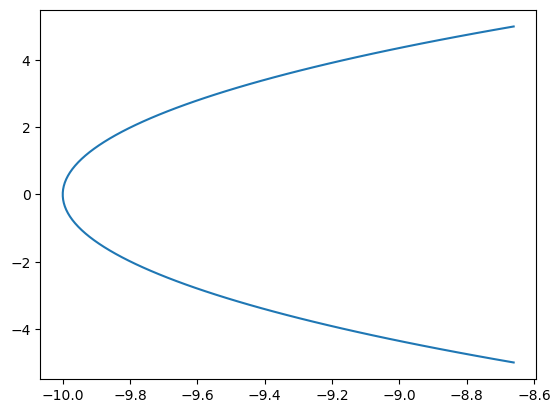

In [150]:
plt.plot(-y,-x)

In [151]:
y = np.hstack([y,-y])
x = np.hstack([x,-x])

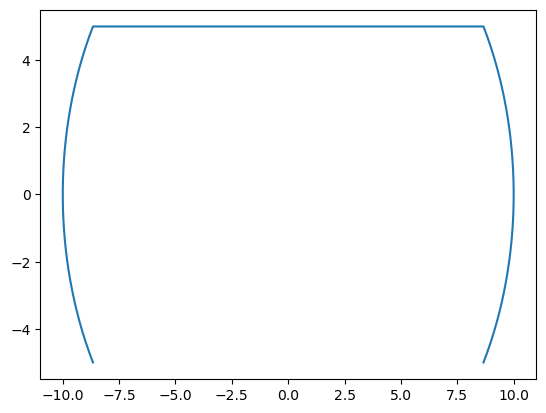

In [152]:
plt.plot(y,x)

In [153]:
x1= np.linspace(-5.0,5.0,100)
y1= np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1 ,-y1])
x1 = np.hstack([x1,-x1])

In [154]:
## adata clearly not linear separable

In [155]:
y

array([ 8.66025404,  8.71779204,  8.77378994,  8.82827705,  8.88128118,
        8.93282873,  8.98294476,  9.03165312,  9.07897646,  9.12493632,
        9.16955321,  9.21284664,  9.25483518,  9.29553652,  9.3349675 ,
        9.37314414,  9.41008171,  9.44579475,  9.4802971 ,  9.51360192,
        9.54572176,  9.57666854,  9.60645359,  9.63508769,  9.66258107,
        9.68894344,  9.714184  ,  9.73831149,  9.76133416,  9.7832598 ,
        9.80409577,  9.82384901,  9.84252604,  9.86013297,  9.87667553,
        9.89215905,  9.90658851,  9.91996849,  9.93230325,  9.94359667,
        9.9538523 ,  9.96307334,  9.97126266,  9.9784228 ,  9.98455598,
        9.98966408,  9.99374868,  9.99681104,  9.99885209,  9.99987246,
        9.99987246,  9.99885209,  9.99681104,  9.99374868,  9.98966408,
        9.98455598,  9.9784228 ,  9.97126266,  9.96307334,  9.9538523 ,
        9.94359667,  9.93230325,  9.91996849,  9.90658851,  9.89215905,
        9.87667553,  9.86013297,  9.84252604,  9.82384901,  9.80

In [156]:
import pandas as pd 
df1 = pd.DataFrame(np.vstack([y,x]).T , columns = ['X1', 'X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns = ['X1','X2'])
df2['Y'] = 1
df = pd.concat([df1, df2], ignore_index=True)

In [157]:
df1.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [158]:
X = df.iloc[:,:2]
y = df.Y

In [159]:
X.shape, y.shape

((400, 2), (400,))

In [160]:
## polynomial kernel
df['X1_sq'] = df['X1']**2
df['X2_sq'] = df['X2']**2
df['X1*X2'] = df['X1'] * df['X2']

In [161]:
df.head()

,X1,X2,Y,X1_sq,X2_sq,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [162]:
X = df[['X1_sq','X2_sq','X1*X2']]
y = df[['Y']]

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [164]:
X_train.shape, X_test.shape , Y_train.shape, Y_test.shape

((300, 3), (100, 3), (300, 1), (100, 1))

In [165]:
fig = px.scatter_3d(df, x = 'X1', y = 'X2', z = 'X1*X2', color = 'Y')

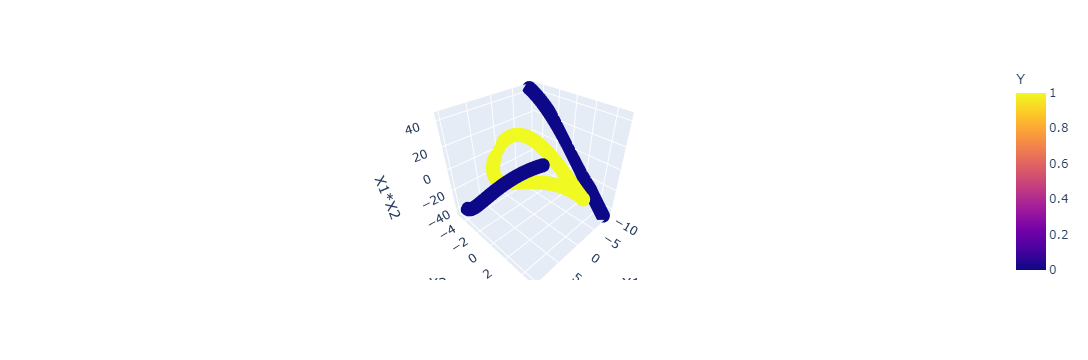

In [166]:
fig.show()
# not linearly separable

In [167]:
import plotly.express as px 

In [168]:
fig = px.scatter_3d(df,x = 'X1_sq', y = 'X2_sq', z = 'X1*X2', color = 'Y')

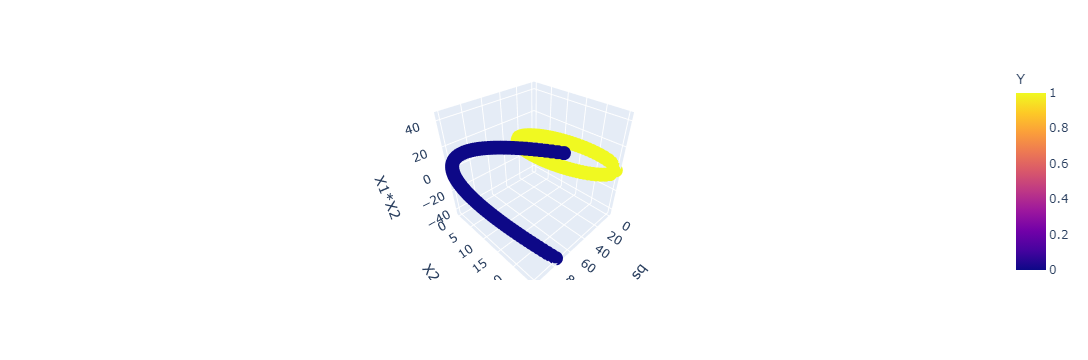

In [169]:
fig.show()
# data becomes linearly separable if we extrappolate data using the x1_sq, x2_sq and x1 x2

In [170]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = "linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_pred, y_test)

C:\Users\thaku\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



1.0

In [176]:
## giving 100 percent acuracy , kernel = 'Poly' would actually cacluate all these internally and use to draw the curve 
# rbf can also be used uses exponential formula

In [177]:
y_train.size

300